In [55]:
import numpy as np
from sklearn.metrics import euclidean_distances
import pandas as pd
from minisom import MiniSom
from pylab import bone, pcolor, colorbar, plot, show
from supervisedSom import supervisedSom

In [56]:
data = pd.read_csv(r"../data/SD-2X_rocktype.csv")
x = data.iloc[:, 0:6].values
y = data.iloc[:, 6].values
y [y==4] = 0
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=44)

# use Minmaxscaler because we use euclidean distance
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
x_train = minmax.fit_transform(x_train)
x_test = minmax.transform(x_test)

In [57]:
data.head()

,GR_F,NPHIC,RHOBC,DTC,VCL_FINAL,PHIE_FINAL,TypeRock
0,38.6034,0.2335,2.263,79.249,0.0687,0.2262,1
1,37.3566,0.2143,2.279,78.297,0.0617,0.2174,1
2,37.9742,0.1999,2.279,73.672,0.0652,0.2169,1
3,39.3757,0.1950,2.333,72.702,0.0731,0.1833,2
4,44.2722,0.2019,2.401,68.824,0.1022,0.1385,3


In [58]:
np.unique(y)

array([0, 1, 2, 3], dtype=int64)

In [59]:
x_train1 = x_train[0:331]
x_train2 = x_train[332:663]
x_train3 = x_train[664:995]

y_train1 = y_train[0:331]
y_train2 = y_train[332:663]
y_train3 = y_train[664:995]

In [60]:
# Training the SOM
from minisom import MiniSom
som1 = MiniSom(x = 15, y = 15, input_len = 6, sigma = 1.0, learning_rate = 0.5)
som1.random_weights_init(x_train1)
som1.train_random(data = x_train1, num_iteration = 100)

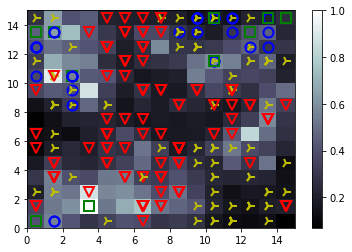

In [61]:
suso1 = supervisedSom(som1, x_train1, y_train1)

label1= suso1.visualSom()

In [62]:
propa1 = suso1.propabilitySom()

taggings1 = suso1.taggingSom()

In [63]:
predicted_y1 = [suso1.predict(instance) for instance in x_test]

from sklearn.metrics import classification_report

print (classification_report(y_test, predicted_y1, target_names=['0','1', '2', '3']))

             precision    recall  f1-score   support

          0       0.93      0.96      0.95       138
          1       0.74      0.95      0.83        55
          2       0.42      0.54      0.47        28
          3       0.88      0.65      0.74       108

avg / total       0.84      0.82      0.82       329



In [64]:
data_new = pd.read_csv(r"../data/SD-3X_rocktype.csv")
x_new = data.iloc[:, 0:6].values
y_new = data.iloc[:, 6].values
y_new[y_new == 4] = 0
x_new = minmax.fit_transform(x_new)
predicted_y_new = [suso1.predict(instance) for instance in x_new]

from sklearn.metrics import classification_report

print (classification_report(y_new, predicted_y_new, target_names=['0', '1', '2', '3']))

             precision    recall  f1-score   support

          0       0.92      0.94      0.93       558
          1       0.63      0.97      0.77       165
          2       0.51      0.42      0.46       139
          3       0.86      0.71      0.78       453

avg / total       0.82      0.81      0.81      1315



In [65]:
# Training the SOM
from minisom import MiniSom
som2 = MiniSom(x = 15, y = 15, input_len = 6, sigma = 1.0, learning_rate = 0.5)
som2.random_weights_init(x_train2)
som2.train_random(data = x_train2, num_iteration = 100)

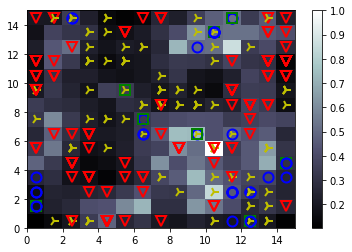

In [66]:
suso2 = supervisedSom(som2, x_train2, y_train2)

label2= suso2.visualSom()

In [67]:
propa2 = suso2.propabilitySom()

taggings2 = suso2.taggingSom()

In [68]:
predicted_y2 = [suso2.predict(instance) for instance in x_test]

from sklearn.metrics import classification_report

print (classification_report(y_test, predicted_y2, target_names=['0','1', '2', '3']))

             precision    recall  f1-score   support

          0       0.94      0.88      0.91       138
          1       0.90      0.64      0.74        55
          2       0.33      0.54      0.41        28
          3       0.75      0.80      0.77       108

avg / total       0.82      0.78      0.79       329



In [69]:
predicted_y_new2 = [suso2.predict(instance) for instance in x_new]

from sklearn.metrics import classification_report

print (classification_report(y_new, predicted_y_new2, target_names=['0','1', '2', '3']))

             precision    recall  f1-score   support

          0       0.92      0.89      0.90       558
          1       0.86      0.76      0.81       165
          2       0.45      0.58      0.50       139
          3       0.76      0.77      0.77       453

avg / total       0.81      0.80      0.80      1315



In [70]:
# Training the SOM
from minisom import MiniSom
som3 = MiniSom(x = 15, y = 15, input_len = 6, sigma = 1.0, learning_rate = 0.5)
som3.random_weights_init(x_train3)
som3.train_random(data = x_train3, num_iteration = 100)

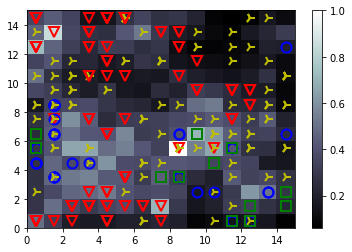

In [71]:
suso3 = supervisedSom(som3, x_train3, y_train3)

label3 = suso3.visualSom()

In [72]:
propa3 = suso3.propabilitySom()

taggings3 = suso3.taggingSom()

In [73]:
predicted_y3 = [suso3.predict(instance) for instance in x_test]

from sklearn.metrics import classification_report

print (classification_report(y_test, predicted_y3, target_names=['0','1', '2', '3']))

             precision    recall  f1-score   support

          0       0.95      0.91      0.93       138
          1       0.96      0.85      0.90        55
          2       0.57      0.46      0.51        28
          3       0.75      0.87      0.80       108

avg / total       0.85      0.85      0.85       329



In [74]:
predicted_y_new3 = [suso3.predict(instance) for instance in x_new]

from sklearn.metrics import classification_report

print (classification_report(y_new, predicted_y_new3, target_names=['0','1', '2', '3']))

             precision    recall  f1-score   support

          0       0.97      0.92      0.95       558
          1       0.82      0.84      0.83       165
          2       0.62      0.38      0.47       139
          3       0.77      0.90      0.83       453

avg / total       0.85      0.85      0.84      1315



In [75]:
ensemble = [np.asarray(predicted_y_new), np.asarray(predicted_y_new2), np.asarray(predicted_y_new3)]

In [76]:
len(ensemble[0])

1315

In [77]:
predict = [np.bincount([ensemble[j][i] for j in range(3)]).argmax() for i in range(len(ensemble[1]))]

In [78]:
print (classification_report(y_new, predict, target_names=['0','1', '2', '3']))

             precision    recall  f1-score   support

          0       0.96      0.94      0.95       558
          1       0.69      0.98      0.81       165
          2       0.65      0.40      0.50       139
          3       0.84      0.84      0.84       453

avg / total       0.85      0.85      0.85      1315



In [79]:
mapping = som1.win_map(x_train1)
mapping2 = som2.win_map(x_train2)
mapping3 = som3.win_map(x_train3)

In [80]:
result2 = np.array([])
propa1 = suso1.propabilitySom()
propa2 = suso2.propabilitySom()
propa3 = suso3.propabilitySom()
for sample in x_new:
    pos1 = suso1.find_closest(sample)
    pos2 = suso2.find_closest(sample)
    pos3 = suso3.find_closest(sample)
    l1 = len(mapping[pos1])
    l2 = len(mapping2[pos2])
    l3 = len(mapping3[pos3])
#     (pro1, pro2, pro3, pro4) = ((l1*propa[pos1]))
    
    pro1 = (l1*propa1[0, pos1[0], pos1[1]] + l2*propa2[0, pos2[0], pos2[1]] + l3*propa3[0, pos3[0], pos3[1]])/(l1+l2+l3)
    pro2 = (l1*propa1[1, pos1[0], pos1[1]] + l2*propa2[1, pos2[0], pos2[1]] + l3*propa3[1, pos3[0], pos3[1]])/(l1+l2+l3)
    pro3 = (l1*propa1[2, pos1[0], pos1[1]] + l2*propa2[2, pos2[0], pos2[1]] + l3*propa3[2, pos3[0], pos3[1]])/(l1+l2+l3)
    pro4 = (l1*propa1[3, pos1[0], pos1[1]] + l2*propa2[3, pos2[0], pos2[1]] + l3*propa3[3, pos3[0], pos3[1]])/(l1+l2+l3)
    tmp = np.argmax(np.array([pro1, pro2, pro3, pro4]))
    result2 = np.append(result2, tmp)

In [81]:
from sklearn.metrics import classification_report

print (classification_report(y_new, result2, target_names=['0','1', '2', '3']))

             precision    recall  f1-score   support

          0       0.96      0.95      0.96       558
          1       0.73      0.90      0.81       165
          2       0.66      0.69      0.67       139
          3       0.89      0.82      0.86       453

avg / total       0.88      0.87      0.87      1315



KẾT QUẢ TRAIN NGÀY 20180825
- PHÁT HIỆN RA NGÀY 20180824 BỊ NHẦM LẪN TRONG KHI TÍNH XÁC XUẤT, NHẦM LẪN Ở CHỖ: VỚI CÙNG 1 DỮ LIỆU, MÌNH LẠI SỬ DỤNG CHUNG 1 MẢNG MAPPING, MẢNG MAPPING LÀ MẢNG ĐỂ TÍNH TOÁN XEM TẠI NEURON ĐÓ NÓ HÚT BAO NHIÊU MẪU 
- ĐỂ XỬ LÍ VẤN ĐỀ OVERLAPPING CHỈ ĐƠN GIẢN LÀ TĂNG KÍCH THƯỚC MAP
- THỬ NGHIỆM 2 VIỆC CHIA DỮ LIỆU THÀNH 3 PHẦN RỒI TRAIN 3 MAP SO VỚI VIỆC ĐỂ NGUYÊN DỮ LIỆU TRAIN 3 MAP THÌ THẤY RẰNG, VỚI VIỆC TĂNG KÍCH THƯỚC MAP THÌ CÀNG NHIỀU DỮ LIỆU CÀNG TỐT